In [148]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import curve_fit
import pandas as pd

In [62]:
rpm100 = pd.read_csv('20191120_Kinetics_CV_100rpm_C02.txt',sep='\t',header=(0),usecols=range(12)) 
rpm400 = pd.read_csv('20191120_Kinetics_CV_400rpm_C02.txt',sep='\t',header=(0),usecols=range(12)) 
rpm900 = pd.read_csv('20191120_Kinetics_CV_900rpm_C02.txt',sep='\t',header=(0),usecols=range(12)) 
rpm1600 = pd.read_csv('20191120_Kinetics_CV_1600rpm_C02.txt',sep='\t',header=(0),usecols=range(12)) 
rpm2500 = pd.read_csv('20191120_Kinetics_CV_2500rpm_C02.txt',sep='\t',header=(0),usecols=range(12)) 

In [63]:
rpm100

,mode,ox/red,error,control changes,counter inc.,time/s,control/V,Ewe/V,I/mA,cycle number,(Q-Qo)/C,P/W
0,2,1,0,0,0,0.000000,-0.99699,-0.997236,0,1.0,0.000000,0.000151
1,2,1,0,0,0,0.011000,-0.99644,-0.996727,0,1.0,-0.000001,0.000124
2,2,1,0,0,0,0.031000,-0.99544,-0.995692,0,1.0,-0.000004,0.000093
3,2,1,0,0,0,0.051000,-0.99444,-0.994655,0,1.0,-0.000005,0.000076
4,2,1,0,0,0,0.071000,-0.99344,-0.993718,0,1.0,-0.000007,0.000066
...,...,...,...,...,...,...,...,...,...,...,...,...
15968,2,0,0,1,1,319.870392,-0.99654,-0.996859,0,4.0,0.008810,0.000009
15969,2,0,0,1,1,319.890392,-0.99754,-0.997832,0,4.0,0.008810,0.000009
15970,2,0,0,1,1,319.910392,-0.99854,-0.998815,0,4.0,0.008810,0.000009
15971,2,0,0,1,1,319.929392,-0.99949,-0.999849,0,4.0,0.008809,0.000009


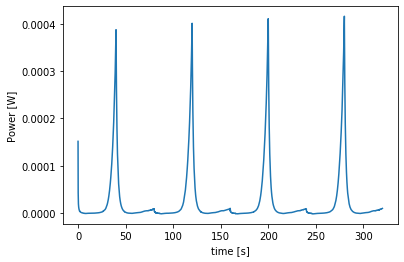

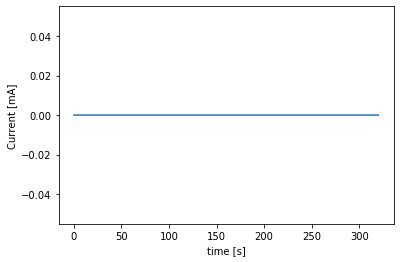

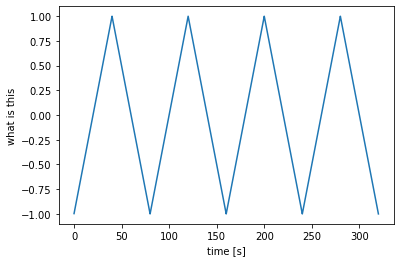

In [64]:
plt.plot(rpm100['time/s'],rpm100['P/W'])
plt.ylabel('Power [W]')
plt.xlabel('time [s]')
plt.show()

plt.plot(rpm100['time/s'],rpm100['I/mA'])
plt.ylabel('Current [mA]')
plt.xlabel('time [s]')
plt.show()

plt.plot(rpm100['time/s'],rpm100['Ewe/V'])
plt.ylabel('what is this')
plt.xlabel('time [s]')
plt.show()

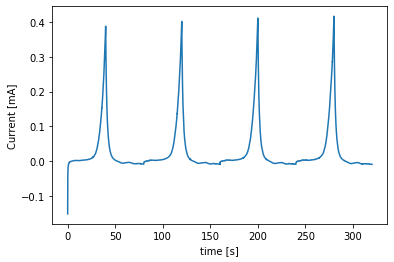

In [65]:
P_100 = np.array(rpm100['P/W'])
Ewe_100 = np.array(rpm100['Ewe/V'])
I_100 = P_100/Ewe_100*1000 
cycles_100 = rpm100['cycle number']

plt.plot(rpm100['time/s'],I_100)
plt.ylabel('Current [mA]')
plt.xlabel('time [s]')
plt.show()

In [113]:
threshold = .5e-3
voltage_of_interest = 0.3 #V
currents_pt3 = np.zeros(4)
#print the first occurrence of the 
print('index  time(s)  voltage  current(A)')
for item in range(len(Ewe_100)):
    for n in range(1,5):
        if abs(Ewe_100[item] - voltage_of_interest) < threshold and cycles_100[item] == n and I_100[item] > 1e-3:
            print(n)
            print(f"{item:}   {rpm100['time/s'][item]:5.2f}  {Ewe_100[item]:8.4f}  {I_100[item]:10.2e}")
            currents_pt3[n-1] = I_100[item]
            
avg_current_pt3 = np.average(currents_pt3)/1000
avg_current_pt3

index  time(s)  voltage  current(A)
1
1294   25.94    0.2997    9.54e-03
2
5289   105.95    0.3001    1.15e-02
3
9285   185.95    0.3000    1.23e-02
4
13277   265.94    0.2996    1.27e-02


1.1508109993556407e-05

In [ ]:
def find_current_voltage_pair(voltage_of_interest)

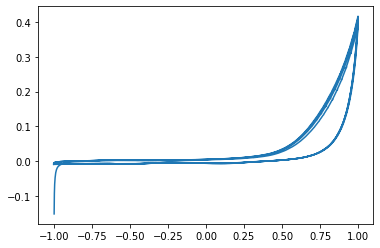

In [128]:
# m = 0
# Es = []
# Is = []
# while cycles_100[m] == 1:
#     Es.append(Ewe_100[m])
#     Is.append(I_100[m])
    
plt.plot(Ewe_100,I_100)

In [123]:
E_cycle1 = []
E_cycle2 = []
E_cycle3 = []
E_cycle4 = []

i_cycle1 = []
i_cycle2 = []
i_cycle3 = []
i_cycle4 = []

for m in range(len(cycles_100)):
    if cycles_100[m] == 1:
        E_cycle1.append(Ewe_100[m])
        i_cycle1.append(I_100[m])
    elif cycles_100[m] == 2:
        E_cycle2.append(Ewe_100[m])
        i_cycle2.append(I_100[m])
    elif cycles_100[m] == 3:
        E_cycle3.append(Ewe_100[m])
        i_cycle3.append(I_100[m])
    elif cycles_100[m] == 4:
        E_cycle4.append(Ewe_100[m])
        i_cycle4.append(I_100[m])

len(E_cycle1), len(E_cycle2), len(E_cycle3), len(E_cycle4)

(3991, 3996, 3994, 3992)

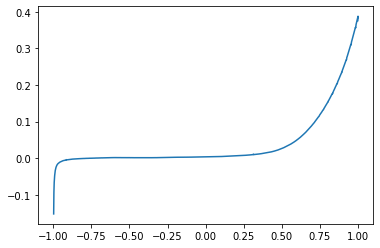

In [132]:
a = int(len(E_cycle1)/2)
plt.plot(E_cycle1[0:a],i_cycle1[0:a])

In [190]:
def BV(E_cell, j0, aa, ac):
    F = 96485.33212 #C/mol
    R = 8.314 #J/mol-K
    T = 293 #K
    overpotential = E_cell - 1.1
    z = 2
    
    j = j0*(np.exp(aa*z*F*overpotential*(R*T)**(-1))-np.exp(ac*z*F*overpotential*(R*T)**(-1)))
    
    return j

In [209]:
# curve_fit(objective_function, E_cycle1[0:a],i_cycle1[0:a])[0]
ans = curve_fit(BV, np.array(E_cycle1[0:a]),i_cycle1[0:a])
j0_fit, aa_fit, ac_fit = ans[0]
print('j0,aa,ac:', j0_fit, aa_fit, ac_fit)
pcov = ans[1]
perr = np.sqrt(np.diag(pcov))
print('errors:',perr)
print('errors r this % of values:{:.2}'.format(perr/ans[0][0*100))

j0,aa,ac: 0.6984020846041802 0.06535228115004106 0.36501861371928523
errors: [0.00586936 0.00034955 0.01025805]


TypeError: unsupported format string passed to numpy.ndarray.__format__

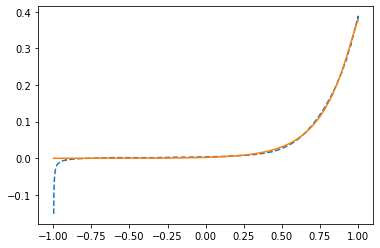

In [197]:
j_fits = BV(np.array(E_cycle1[0:a]),j0_fit, aa_fit, ac_fit)
plt.plot(E_cycle1[0:a],i_cycle1[0:a], '--')
plt.plot(E_cycle1[0:a],j_fits)
